# Final Results


## Introduction and loading of data

In [ ]:
#Key imports
import numpy as np #multi-dimensional arrays (tensors) operations
import pandas as pd #dataframe operations and analysis
import matplotlib.pyplot as plt #plots and graphs (MATLAB-like interface

import os #library for system-dependent functionalities

import re #regex operations

In [ ]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive') #mount my private Google Drive on Colab environment

Mounted at /content/drive


First approach:

* **Dataset:** smaller, generated with just the two original prompts;
* **Training strategy:** 3 epochs, 4-fold validation and test splitting (20%);

Second approach:

*   **Dataset:** bigger, generated with more than two prompts;
*   **Training strategy**: 5 epochs, validation (15%) and test (15%) splitting;




Loading data...

In [ ]:
#Inspect Drive folder for training/validation histories

# Input: string dir
#        string filename
# Output: creates and returns a pandas dataframe "data" from the dir/filename.csv file and displays its structure
def load_dataframe_and_print_info(dir, filename):
    file_path=os.path.join(dir, filename)
    data=pd.read_csv(file_path)
    print('Dataset', filename)
    data.info()
    print('\n')
    return data



#FIRST APPROACH
print('Available data:')
working_dir='/content/drive/MyDrive/Magistrale/II Anno/Deep Learning /Project'
data_dir=file_path=os.path.join(working_dir, 'Training&TestingResults')
pattern=re.compile(r'history_1.*\.csv$') #results of the model trained on the first dataset, with k-fold validation
filenames3=[]
for f in os.listdir(data_dir): #inspect folder's content
    if pattern.match(f):
      print('-', f)
      filenames3.append(f)

print('\n')

train_results2=[]
legend3=[]
for i in range(len(filenames3)):
   train_results2.append(load_dataframe_and_print_info(data_dir, filenames3[i]))
   legend_cur=filenames3[i].replace("history_", "")
   legend_cur=legend_cur.replace(".csv", "")
   legend3.append(legend_cur)





#SECOND APPROACH
# Definizione del pattern per il nome dei file
pattern = re.compile(r'history_2.*\.csv$')
print('Available data:')
filenames = []
# Iterazione sui file nella directory data_dir (in ordine inverso)
for f in reversed(os.listdir(data_dir)):
    if pattern.match(f):
        print('-', f)
        filenames.append(f)

print('\n')
# Caricamento dei risultati di training e costruzione della legenda in ordine inverso
train_results = []
legend = []
for i in range(len(filenames)):
    train_results.append(load_dataframe_and_print_info(data_dir, filenames[i]))
    legend_cur = filenames[i].replace("history_", "")
    legend_cur = legend_cur.replace(".csv", "")
    legend.append(legend_cur)

Available data:
- history_1.csv
- history_1L.csv
- history_1S.csv
- history_1SW.csv
- history_1SWL.csv
- history_1SWS.csv


Dataset history_1.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   loss      3 non-null      float64
 1   acc       3 non-null      float64
 2   val_loss  3 non-null      float64
 3   val_acc   3 non-null      float64
dtypes: float64(4)
memory usage: 224.0 bytes


Dataset history_1L.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   loss      3 non-null      float64
 1   acc       3 non-null      float64
 2   val_loss  3 non-null      float64
 3   val_acc   3 non-null      float64
dtypes: float64(4)
memory usage: 224.0 bytes


Dataset history_1S.csv
<class 'pandas.core.frame.DataFrame'>
RangeInd

Attempted texts pre-processings on the bigger dataset:

FIRST

* **1:** just standard pre-preprocessing (normalization, bad words removal and tokenization);
* **1S:** standard pre-preprocessing + stemming;
* **1SW:** standard pre-preprocessing + stop words removal;
* **1L:** standard pre-preprocessing + lemmatization;
* **1SWS:** standard pre-preprocessing + stop words removal + stemming;
* **1SWL:** standard pre-preprocessing + stop words removal + lemmatization;

SECOND

*   **2:** just standard pre-preprocessing (normalization, bad words removal and tokenization);
*   **2S:** standard pre-preprocessing + stemming;
*   **2SW:** standard pre-preprocessing + stop words removal;
*   **2L:** standard pre-preprocessing + lemmatization;
*   **2SWS:** standard pre-preprocessing + stop words removal + stemming;
*   **2SWL:** standard pre-preprocessing + stop words removal + lemmatization;



In [ ]:
print(legend3)
print(legend)


['1', '1L', '1S', '1SW', '1SWL', '1SWS']
['2', '2L', '2S', '2SW', '2SWL', '2SWS']


## Training and Validation results
Monitored metrics:


1.   Loss function value (should be minimized);
2.   Accuracy value (percentage of correctly labelled texts, should approach 1);


Training Loss

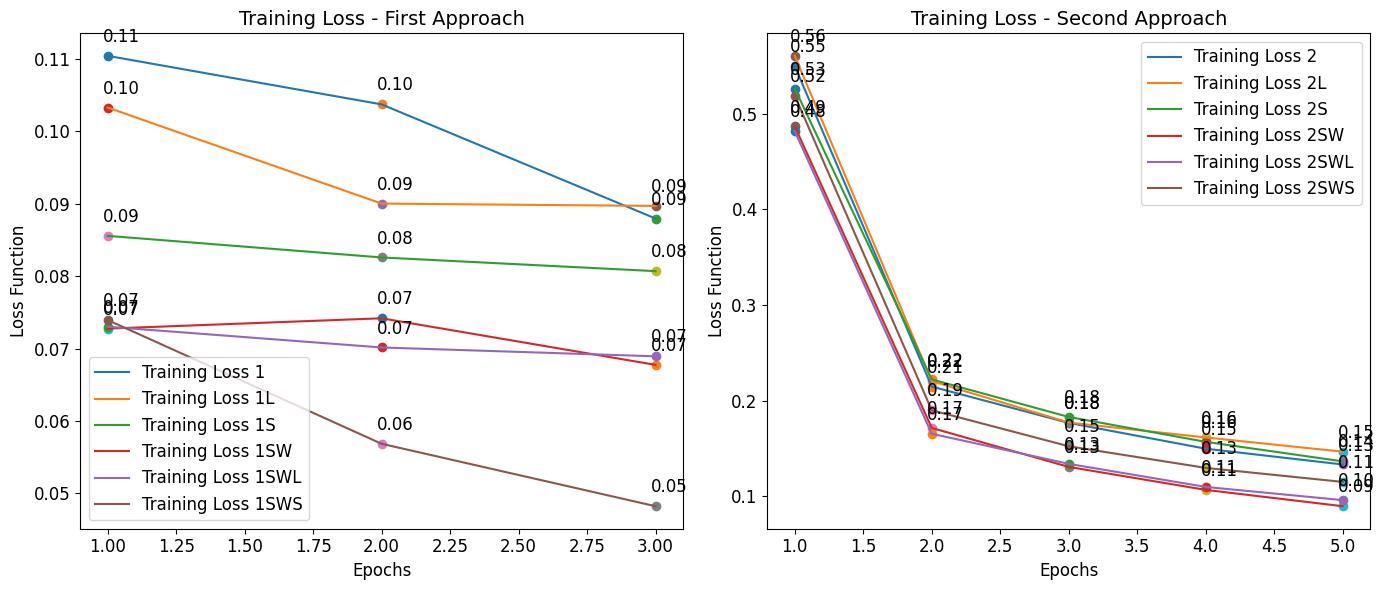

In [ ]:
# Configurazioni
EPOCHS_2 = 3
EPOCHS = 5

# Dati per il primo plot
loss_values2 = []
for i in range(len(train_results2)):
    loss_values2.append(train_results2[i]['loss'])

epochs2 = range(1, EPOCHS_2 + 1)

# Dati per il secondo plot
loss_values = []
for i in range(len(train_results)):
    loss_values.append(train_results[i]['loss'])

epochs = range(1, EPOCHS + 1)

# Creazione della figura con due subplot affiancati
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

# Primo subplot - First Approach
for idx, losses in enumerate(loss_values2):
    ax1.plot(epochs2, losses, label=f'Training Loss {legend3[idx]}')
    for i, loss in enumerate(losses):
        ax1.scatter(i + 1, loss, marker='o')
        ax1.annotate(f'{loss:.2f}', (i + 1, loss), textcoords="offset points", xytext=(10, 10), ha='center', fontsize=12)
ax1.set_title('Training Loss - First Approach', fontsize=14)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Loss Function', fontsize=12)
ax1.legend(fontsize=12)
ax1.tick_params(axis='both', which='major', labelsize=12)

# Secondo subplot - Second Approach
for idx, losses in enumerate(loss_values):
    ax2.plot(epochs, losses, label=f'Training Loss {legend[idx]}')
    for i, loss in enumerate(losses):
        ax2.scatter(i + 1, loss, marker='o')
        ax2.annotate(f'{loss:.2f}', (i + 1, loss), textcoords="offset points", xytext=(10, 10), ha='center', fontsize=12)
ax2.set_title('Training Loss - Second Approach', fontsize=14)
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Loss Function', fontsize=12)
ax2.legend(fontsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)

# Mostra la figura con i due subplot
plt.tight_layout()
plt.show()

Validation Loss

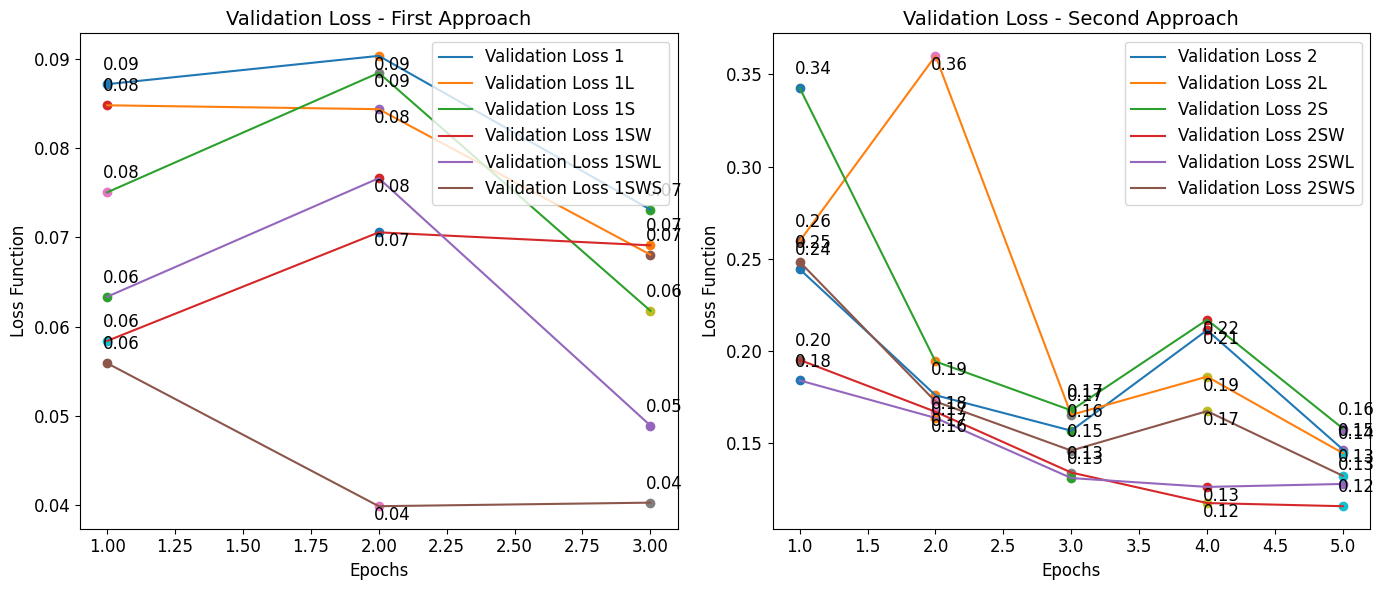

In [ ]:
# Configurazioni
EPOCHS_2 = 3
EPOCHS = 5

# Dati per il primo plot
val_loss_values2 = []
for i in range(len(train_results2)):
    val_loss_values2.append(train_results2[i]['val_loss'])

epochs2 = range(1, EPOCHS_2 + 1)

# Dati per il secondo plot
val_loss_values = []
for i in range(len(train_results)):
    val_loss_values.append(train_results[i]['val_loss'])

epochs = range(1, EPOCHS + 1)

# Creazione della figura con due subplot affiancati
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Primo subplot - First Approach
for idx, losses in enumerate(val_loss_values2):
    ax1.plot(epochs2, losses, label=f'Validation Loss {legend3[idx]}')
    for i, loss in enumerate(losses):
        offset = 10 if i % 2 == 0 else -10
        ax1.scatter(i + 1, loss, marker='o')
        ax1.annotate(f'{loss:.2f}', (i + 1, loss), textcoords="offset points", xytext=(10, offset), ha='center', fontsize=12)
ax1.set_title('Validation Loss - First Approach', fontsize=14)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Loss Function', fontsize=12)
ax1.legend(fontsize=12)
ax1.tick_params(axis='both', which='major', labelsize=12)

# Secondo subplot - Second Approach
for idx, losses in enumerate(val_loss_values):
    ax2.plot(epochs, losses, label=f'Validation Loss {legend[idx]}')
    for i, loss in enumerate(losses):
        offset = 10 if i % 2 == 0 else -10
        ax2.scatter(i + 1, loss, marker='o')
        ax2.annotate(f'{loss:.2f}', (i + 1, loss), textcoords="offset points", xytext=(10, offset), ha='center', fontsize=12)
ax2.set_title('Validation Loss - Second Approach', fontsize=14)
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Loss Function', fontsize=12)
ax2.legend(fontsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)

# Mostra la figura con i due subplot
plt.tight_layout()
plt.show()

Training Accuracy

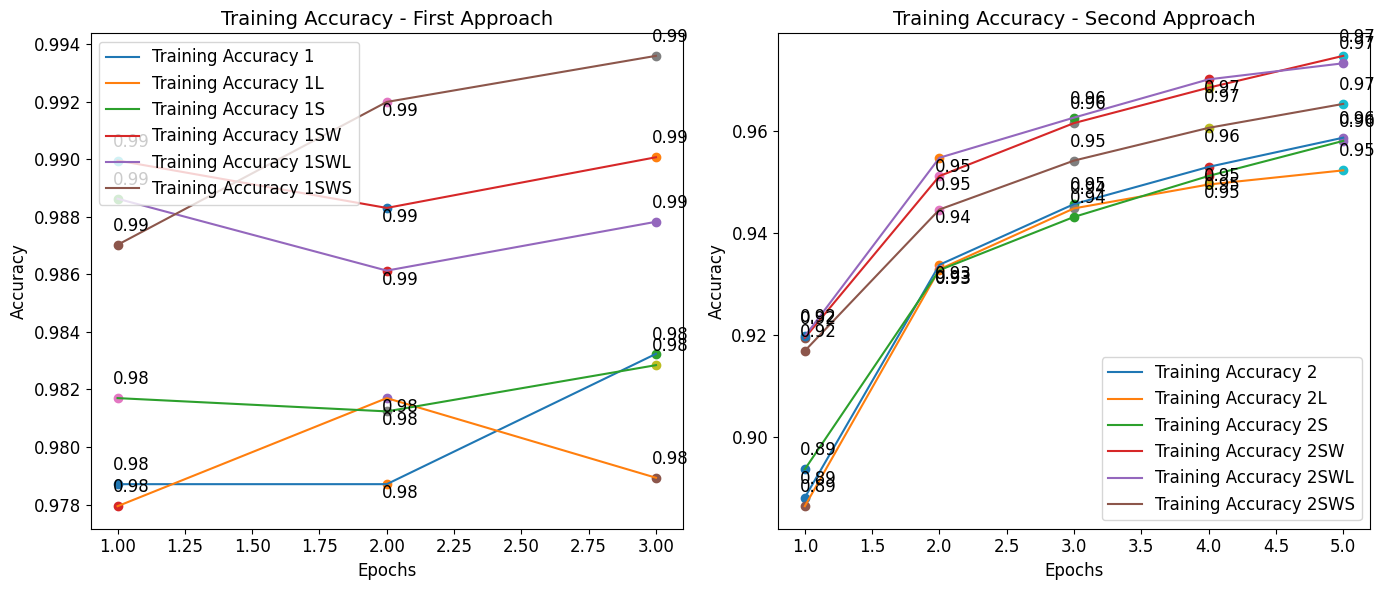

In [ ]:
# Configurazioni
EPOCHS_2 = 3
EPOCHS = 5

# Dati per il primo plot
acc_values2 = []
for i in range(len(train_results2)):
    acc_values2.append(train_results2[i]['acc'])

epochs2 = range(1, EPOCHS_2 + 1)

# Dati per il secondo plot
acc_values = []
for i in range(len(train_results)):
    acc_values.append(train_results[i]['acc'])

epochs = range(1, EPOCHS + 1)

# Creazione della figura con due subplot affiancati
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Primo subplot - First Approach
for idx, acc in enumerate(acc_values2):
    ax1.plot(epochs2, acc, label=f'Training Accuracy {legend3[idx]}')
    for i, a in enumerate(acc):
        offset = 10 if i % 2 == 0 else -10
        ax1.scatter(i + 1, a, marker='o')
        ax1.annotate(f'{a:.2f}', (i + 1, a), textcoords="offset points", xytext=(10, offset), ha='center', fontsize=12)
ax1.set_title('Training Accuracy - First Approach', fontsize=14)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend(loc='upper left',fontsize=12)
ax1.tick_params(axis='both', which='major', labelsize=12)

# Secondo subplot - Second Approach
for idx, acc in enumerate(acc_values):
    ax2.plot(epochs, acc, label=f'Training Accuracy {legend[idx]}')
    for i, a in enumerate(acc):
        offset = 10 if i % 2 == 0 else -10
        ax2.scatter(i + 1, a, marker='o')
        ax2.annotate(f'{a:.2f}', (i + 1, a), textcoords="offset points", xytext=(10, offset), ha='center', fontsize=12)
ax2.set_title('Training Accuracy - Second Approach', fontsize=14)
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.legend( fontsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)

# Mostra la figura con i due subplot
plt.tight_layout()
plt.show()

Validation Accuracy

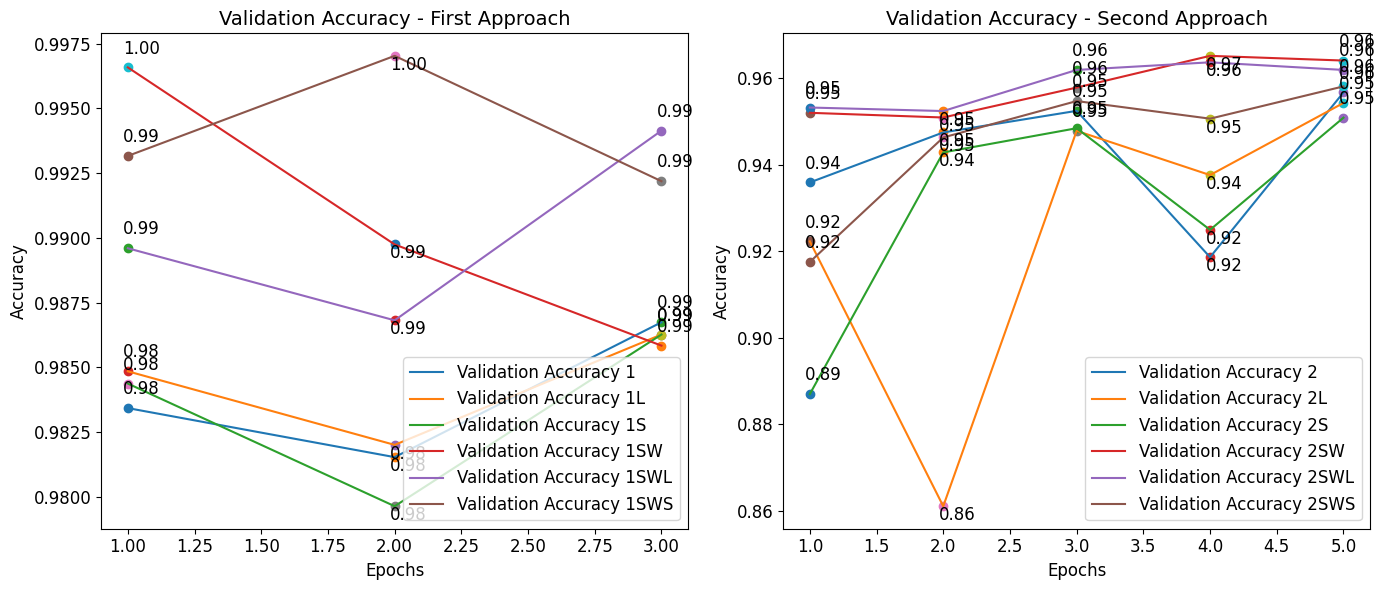

In [ ]:
# Configurazioni
EPOCHS_2 = 3
EPOCHS = 5

# Dati per il primo plot
val_acc_values2 = []
for i in range(len(train_results2)):
    val_acc_values2.append(train_results2[i]['val_acc'])

epochs2 = range(1, EPOCHS_2 + 1)

# Dati per il secondo plot
val_acc_values = []
for i in range(len(train_results)):
    val_acc_values.append(train_results[i]['val_acc'])

epochs = range(1, EPOCHS + 1)

# Creazione della figura con due subplot affiancati
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Primo subplot - First Approach
for idx, acc in enumerate(val_acc_values2):
    ax1.plot(epochs2, acc, label=f'Validation Accuracy {legend3[idx]}')
    for i, a in enumerate(acc):
        offset = 10 if i % 2 == 0 else -10
        ax1.scatter(i + 1, a, marker='o')
        ax1.annotate(f'{a:.2f}', (i + 1, a), textcoords="offset points", xytext=(10, offset), ha='center', fontsize=12)
ax1.set_title('Validation Accuracy - First Approach', fontsize=14)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend(fontsize=12)
ax1.tick_params(axis='both', which='major', labelsize=12)

# Secondo subplot - Second Approach
for idx, acc in enumerate(val_acc_values):
    ax2.plot(epochs, acc, label=f'Validation Accuracy {legend[idx]}')
    for i, a in enumerate(acc):
        offset = 10 if i % 2 == 0 else -10
        ax2.scatter(i + 1, a, marker='o')
        ax2.annotate(f'{a:.2f}', (i + 1, a), textcoords="offset points", xytext=(10, offset), ha='center', fontsize=12)
ax2.set_title('Validation Accuracy - Second Approach', fontsize=14)
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.legend( fontsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)

# Mostra la figura con i due subplot
plt.tight_layout()
plt.show()

##  Testing results




**First approach**

Monitored metrics:

1. Loss function value (should be minimized);
2. Accuracy value (percentage of correctly labelled texts, should approach 1);
3. AUC ROC (area under ROC curv): it displays the rate of true positives over the rate of false positives (should be over 0.5 and approach 1);

Performed tests:


1.   Test from 20% splitting from the training data;
2.   Test from different dataset (with same pre-processing);
3.   Test from different dataset (with no pre-processing);
4.   Kaggle submission;

**Second Approach**
Monitored metrics:

1. Loss function value (should be minimized);
2. Accuracy value (percentage of correctly labelled texts, should approach 1);
3. AUC ROC (area under ROC curv): it displays the rate of true positives over the rate of false positives (should be over 0.5 and approach 1);

Performed tests:


1.   Test from 15% splitting from the training data;
2.   Test from different dataset (with same pre-processing);
3.   Test from different dataset (with no pre-processing);
4.   Kaggle submission;


In [ ]:

#first approach
#Inspect Drive folder for testing results
pattern = re.compile(r'test_results_1.*\.csv$')
filenames4 = []
# Iterazione sui file nella directory data_dir e aggiunta alla lista in ordine crescente di nome
for f in sorted(os.listdir(data_dir)):
    if pattern.match(f):
        print('-', f)
        filenames4.append(f)
print('\n')
test_results2 = []
legend4 = []
for i in range(len(filenames4)):
    test_results2.append(load_dataframe_and_print_info(data_dir, filenames4[i]))
    legend_cur = filenames4[i].replace("test_results_", "")
    legend_cur = legend_cur.replace(".csv", "")
    legend4.append(legend_cur)




# Definizione del pattern per il nome dei file
pattern = re.compile(r'test_results_2.*\.csv$')
# Lista vuota per i nomi dei file
filenames2 = []
# Iterazione sui file nella directory data_dir (in ordine inverso)
for f in reversed(os.listdir(data_dir)):
    if pattern.match(f):
        print('-', f)
        filenames2.append(f)

print('\n')
# Caricamento dei risultati dei test e costruzione della legenda in ordine inverso
test_results = []
legend2 = []
for i in range(len(filenames2)):
    test_results.append(load_dataframe_and_print_info(data_dir, filenames2[i]))
    legend_cur = filenames2[i].replace("test_results_", "")
    legend_cur = legend_cur.replace(".csv", "")
    legend2.append(legend_cur)

- test_results_1.csv
- test_results_1L.csv
- test_results_1S.csv
- test_results_1SW.csv
- test_results_1SWL.csv
- test_results_1SWS.csv


Dataset test_results_1.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   loss      3 non-null      float64
 1   accuracy  3 non-null      float64
 2   AUC ROC   3 non-null      float64
dtypes: float64(3)
memory usage: 200.0 bytes


Dataset test_results_1L.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   loss      3 non-null      float64
 1   accuracy  3 non-null      float64
 2   AUC ROC   3 non-null      float64
dtypes: float64(3)
memory usage: 200.0 bytes


Dataset test_results_1S.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 colum

In [ ]:
print(legend2)
print(legend4)

['2', '2L', '2S', '2SW', '2SWL', '2SWS']
['1', '1L', '1S', '1SW', '1SWL', '1SWS']


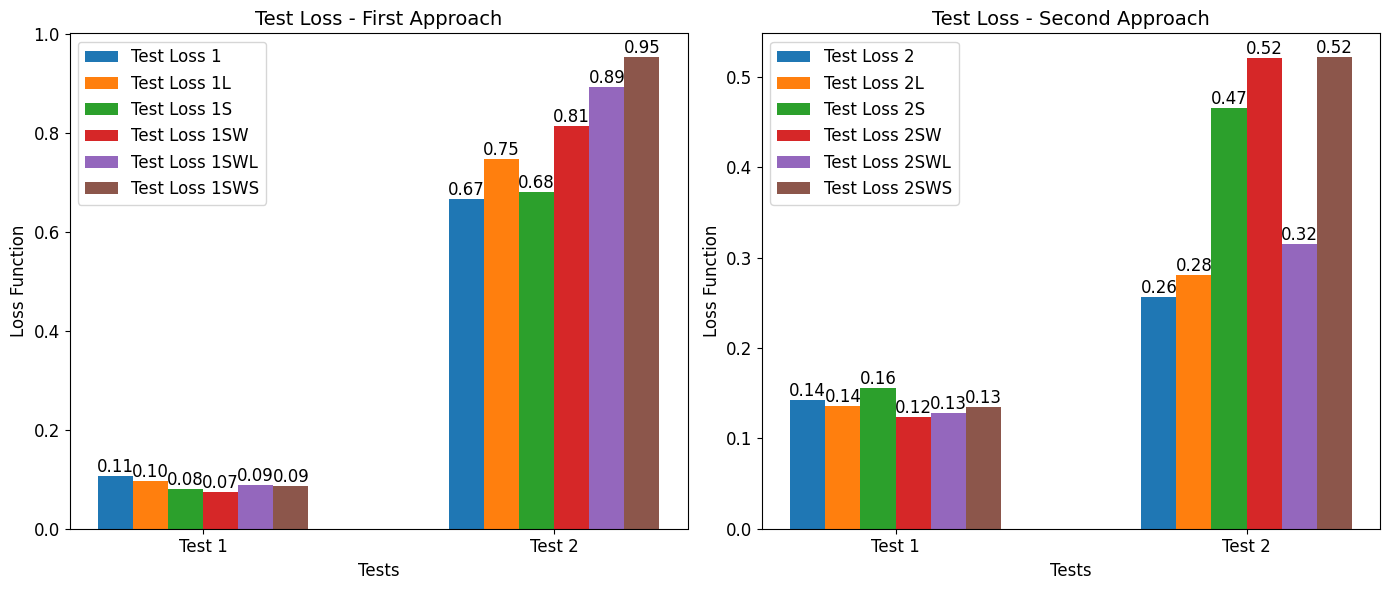

In [ ]:
# Configurazioni
TESTS = 2

# Dati per il primo plot
test_loss_values2 = []
for i in range(len(test_results2)):
    test_loss_values2.append(test_results2[i]['loss'][:TESTS])

# Dati per il secondo plot
test_loss_values = []
for i in range(len(test_results)):
    test_loss_values.append(test_results[i]['loss'][:TESTS])

tests = range(1, TESTS + 1)

# Creazione della figura con due subplot affiancati
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Primo subplot - First Approach
bar_width = 0.1
index = np.arange(TESTS)
labels = ["Test 1", "Test 2"]

for idx, losses in enumerate(test_loss_values2):
    bar_positions = index + idx * bar_width
    bars = ax1.bar(bar_positions, losses, bar_width, label=f'Test Loss {legend4[idx]}')

    for bar in bars:
        yval = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=12)

# Impostazione delle etichette e titolo per il primo subplot
ax1.set_xlabel('Tests', fontsize=12)
ax1.set_ylabel('Loss Function', fontsize=12)
ax1.set_title('Test Loss - First Approach', fontsize=14)
ax1.set_xticks(index + (len(test_loss_values2) - 1) * bar_width / 2)
ax1.set_xticklabels(labels, fontsize=12)
ax1.legend(fontsize=12)
ax1.tick_params(axis='both', which='major', labelsize=12)

# Secondo subplot - Second Approach
for idx, losses in enumerate(test_loss_values):
    bar_positions = index + idx * bar_width
    bars = ax2.bar(bar_positions, losses, bar_width, label=f'Test Loss {legend2[idx]}')

    for bar in bars:
        yval = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=12)

# Impostazione delle etichette e titolo per il secondo subplot
ax2.set_xlabel('Tests', fontsize=12)
ax2.set_ylabel('Loss Function', fontsize=12)
ax2.set_title('Test Loss - Second Approach', fontsize=14)
ax2.set_xticks(index + (len(test_loss_values) - 1) * bar_width / 2)
ax2.set_xticklabels(labels, fontsize=12)
ax2.legend(loc='upper left', fontsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)

# Mostra la figura con i due subplot
plt.tight_layout()
plt.show()

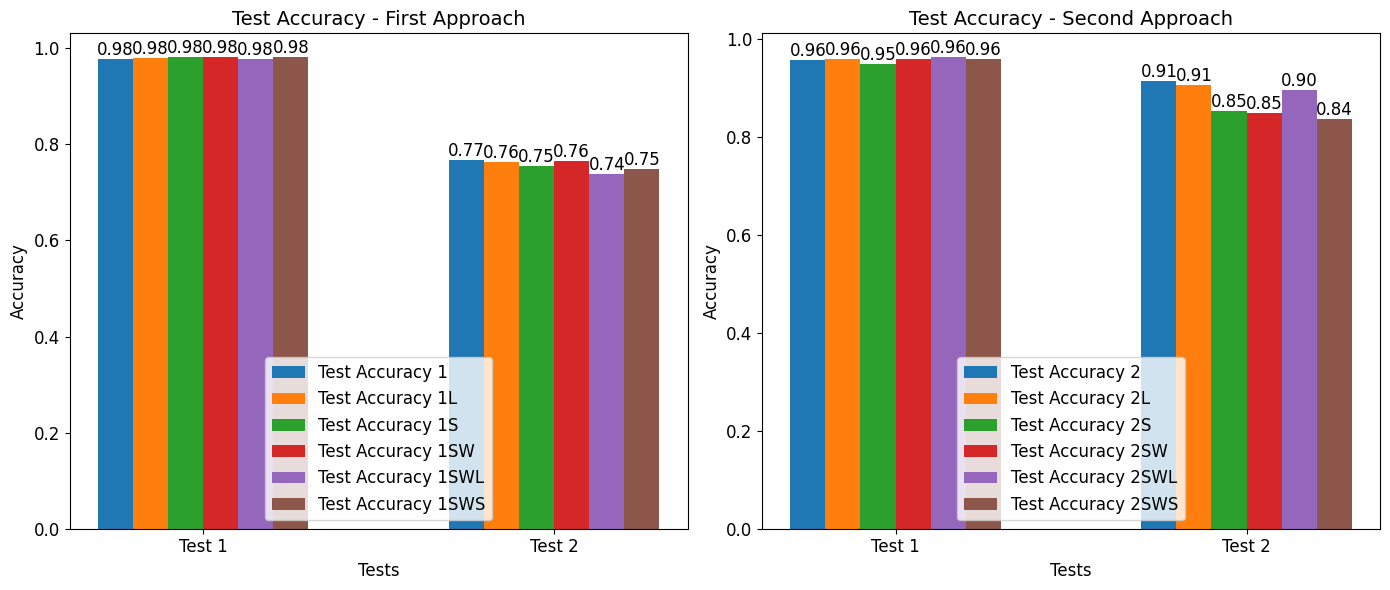

In [ ]:
# Configurazioni
TESTS = 2

# Dati per il primo plot
test_acc_values2 = []
for i in range(len(test_results2)):
    test_acc_values2.append(test_results2[i]['accuracy'][:TESTS])

# Dati per il secondo plot
test_acc_values = []
for i in range(len(test_results)):
    test_acc_values.append(test_results[i]['accuracy'][:TESTS])

tests = range(1, TESTS + 1)

# Creazione della figura con due subplot affiancati
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Primo subplot - First Approach
bar_width = 0.1
index = np.arange(TESTS)
labels = ["Test 1", "Test 2"]

for idx, acc in enumerate(test_acc_values2):
    bar_positions = index + idx * bar_width
    bars = ax1.bar(bar_positions, acc, bar_width, label=f'Test Accuracy {legend4[idx]}')

    for bar in bars:
        yval = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=12)

# Impostazione delle etichette e titolo per il primo subplot
ax1.set_xlabel('Tests', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.set_title('Test Accuracy - First Approach', fontsize=14)
ax1.set_xticks(index + (len(test_acc_values2) - 1) * bar_width / 2)
ax1.set_xticklabels(labels, fontsize=12)
ax1.legend(fontsize=12)
ax1.tick_params(axis='both', which='major', labelsize=12)

# Secondo subplot - Second Approach
for idx, acc in enumerate(test_acc_values):
    bar_positions = index + idx * bar_width
    bars = ax2.bar(bar_positions, acc, bar_width, label=f'Test Accuracy {legend2[idx]}')

    for bar in bars:
        yval = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=12)

# Impostazione delle etichette e titolo per il secondo subplot
ax2.set_xlabel('Tests', fontsize=12)
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.set_title('Test Accuracy - Second Approach', fontsize=14)
ax2.set_xticks(index + (len(test_acc_values) - 1) * bar_width / 2)
ax2.set_xticklabels(labels, fontsize=12)
ax2.legend( fontsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)

# Mostra la figura con i due subplot
plt.tight_layout()
plt.show()

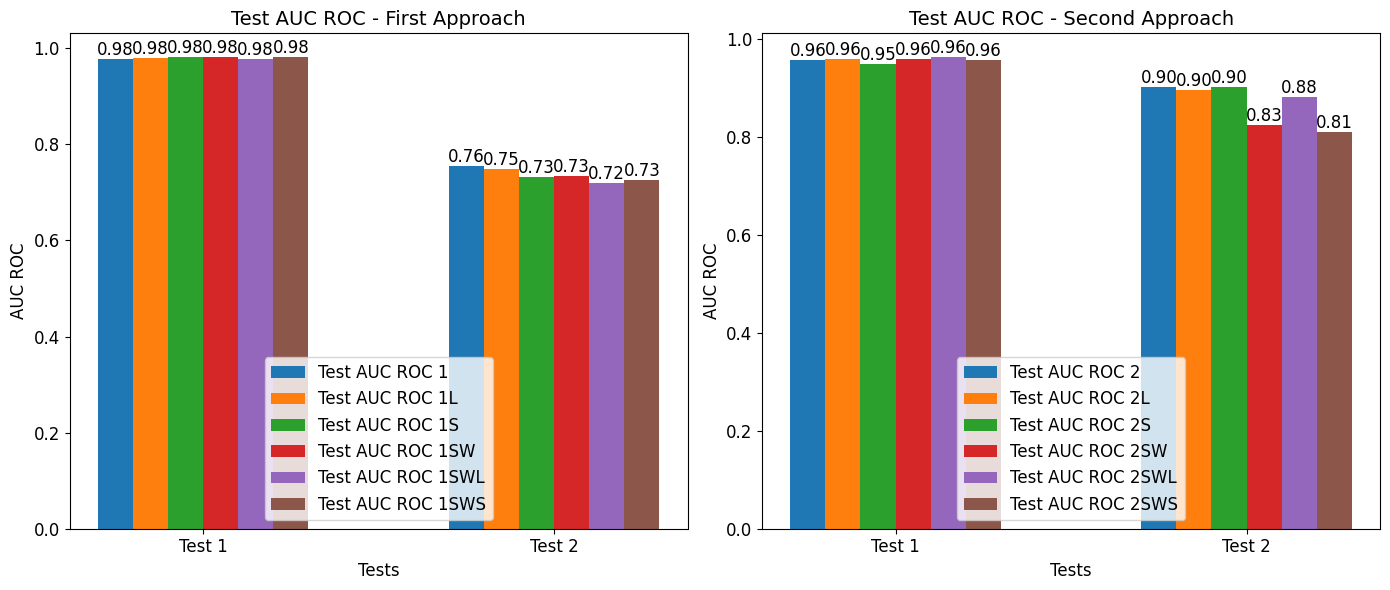

In [ ]:
# Configurazioni
TESTS = 2

# Dati per il primo plot
test_auc_values2 = []
for i in range(len(test_results2)):
    test_auc_values2.append(test_results2[i]['AUC ROC'][:TESTS])

# Dati per il secondo plot
test_auc_values = []
for i in range(len(test_results)):
    test_auc_values.append(test_results[i]['AUC ROC'][:TESTS])

tests = range(1, TESTS + 1)

# Creazione della figura con due subplot affiancati
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Primo subplot - First Approach
bar_width = 0.1
index = np.arange(TESTS)
labels = ["Test 1", "Test 2"]

for idx, auc in enumerate(test_auc_values2):
    bar_positions = index + idx * bar_width
    bars = ax1.bar(bar_positions, auc, bar_width, label=f'Test AUC ROC {legend4[idx]}')

    for bar in bars:
        yval = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=12)

# Impostazione delle etichette e titolo per il primo subplot
ax1.set_xlabel('Tests', fontsize=12)
ax1.set_ylabel('AUC ROC', fontsize=12)
ax1.set_title('Test AUC ROC - First Approach', fontsize=14)
ax1.set_xticks(index + (len(test_auc_values2) - 1) * bar_width / 2)
ax1.set_xticklabels(labels, fontsize=12)
ax1.legend(loc='lower center',fontsize=12)
ax1.tick_params(axis='both', which='major', labelsize=12)

# Secondo subplot - Second Approach
for idx, auc in enumerate(test_auc_values):
    bar_positions = index + idx * bar_width
    bars = ax2.bar(bar_positions, auc, bar_width, label=f'Test AUC ROC {legend2[idx]}')

    for bar in bars:
        yval = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=12)

# Impostazione delle etichette e titolo per il secondo subplot
ax2.set_xlabel('Tests', fontsize=12)
ax2.set_ylabel('AUC ROC', fontsize=12)
ax2.set_title('Test AUC ROC - Second Approach', fontsize=14)
ax2.set_xticks(index + (len(test_auc_values) - 1) * bar_width / 2)
ax2.set_xticklabels(labels, fontsize=12)
ax2.legend( fontsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)

# Mostra la figura con i due subplot
plt.tight_layout()
plt.show()

## Comparisons and Kaggle results

Comparing first and second training approach

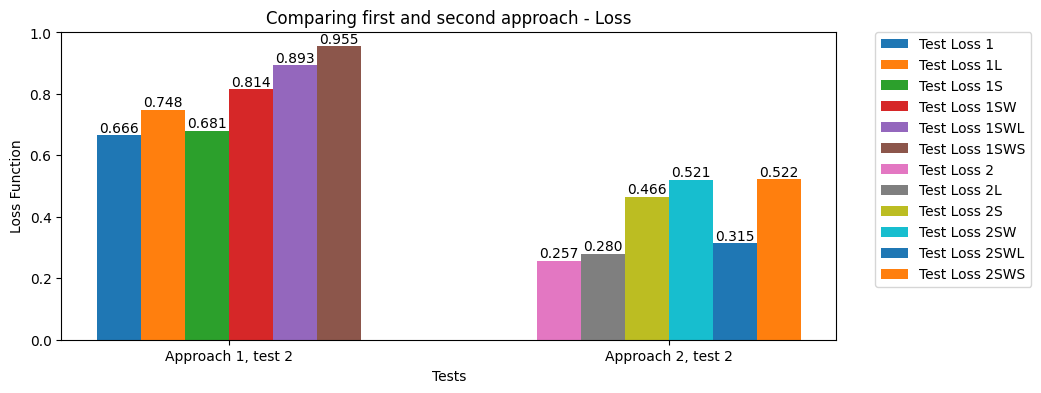

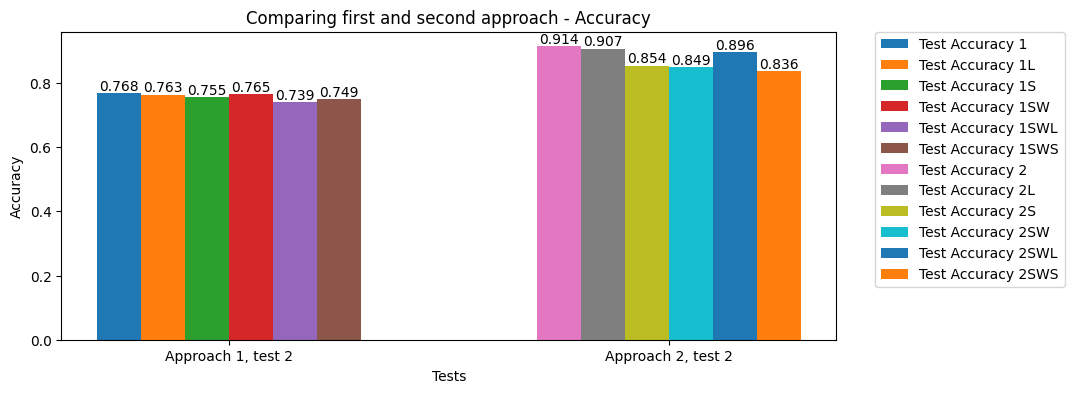

In [ ]:
test2loss = {
    "approach1": [],
    "approach2": [],
}

# Popolamento dei dati per 'approach1' (loss)
for i in range(len(test_results2)):
    test2loss['approach1'].append(test_results2[i]['loss'][1])

# Popolamento dei dati per 'approach2' (loss)
for i in range(len(test_results)):
    test2loss['approach2'].append(test_results[i]['loss'][1])

# Definizione delle dimensioni dei bar e degli indici
bar_width = 0.1
index = np.arange(2)
labels = ["Approach 1, test 2", "Approach 2, test 2"]

# Creazione del primo grafico per 'loss'
plt.figure(figsize=(10, 4))

for idx in range(len(test2loss['approach1'])):
    bar_positions = idx * bar_width
    bars = plt.bar(bar_positions, test2loss['approach1'][idx], bar_width, label=f'Test Loss {legend4[idx]}')

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.3f}', ha='center', va='bottom')

for idx in range(len(test2loss['approach2'])):
    bar_positions = 1 + idx * bar_width
    bars = plt.bar(bar_positions, test2loss['approach2'][idx], bar_width, label=f'Test Loss {legend2[idx]}')

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.3f}', ha='center', va='bottom')

# Impostazione delle etichette e del titolo per il primo grafico
plt.xlabel('Tests')
plt.ylabel('Loss Function')
plt.title('Comparing first and second approach - Loss')
plt.xticks(index + 1.5 / len(test2loss['approach2']), labels[:2])

# Posizionamento personalizzato della legenda per il primo grafico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Mostra il primo grafico
plt.show()








# Popolamento dei dati per 'accuracy'
test2acc = {
    "approach1": [],
    "approach2": [],
}
for i in range(len(test_results2)):
    test2acc['approach1'].append(test_results2[i]['accuracy'][1])

for i in range(len(test_results)):
    test2acc['approach2'].append(test_results[i]['accuracy'][1])

# Definizione delle dimensioni dei bar e degli indici
bar_width = 0.1
index = np.arange(2)
labels = ["Approach 1, test 2", "Approach 2, test 2"]

# Creazione del secondo grafico per 'accuracy'
plt.figure(figsize=(10, 4))

for idx in range(len(test2acc['approach1'])):
    bar_positions = idx * bar_width
    bars = plt.bar(bar_positions, test2acc['approach1'][idx], bar_width, label=f'Test Accuracy {legend4[idx]}')

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.3f}', ha='center', va='bottom')

for idx in range(len(test2acc['approach2'])):
    bar_positions = 1 + idx * bar_width
    bars = plt.bar(bar_positions, test2acc['approach2'][idx], bar_width, label=f'Test Accuracy {legend2[idx]}')

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.3f}', ha='center', va='bottom')

# Impostazione delle etichette e del titolo per il secondo grafico
plt.xlabel('Tests')
plt.ylabel('Accuracy')
plt.title('Comparing first and second approach - Accuracy')
plt.xticks(index + 1.5 / len(test2acc['approach2']), labels[:2])

# Posizionamento personalizzato della legenda per il secondo grafico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Mostra il secondo grafico
plt.show()

Kaggle results

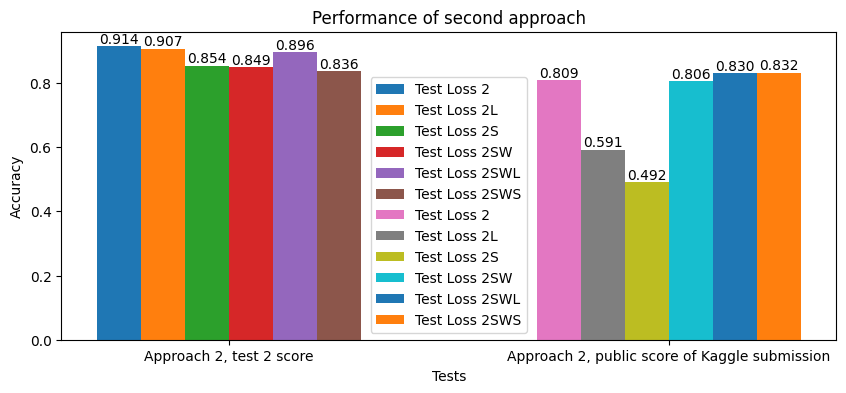

In [ ]:
approach2acc = {
    "OurTest": [],
    "KaggleSub": [],
}

for i in range(len(test_results)):
   approach2acc['OurTest'].append(test_results[i]['accuracy'][1])

approach2acc['KaggleSub'].append(0.809301)
approach2acc['KaggleSub'].append(0.591390)
approach2acc['KaggleSub'].append(0.491587)
approach2acc['KaggleSub'].append(0.806022)
approach2acc['KaggleSub'].append(0.829929)
approach2acc['KaggleSub'].append(0.831775)

# Setting up the bar chart
bar_width = 0.1
index = np.arange(2)
labels = ["Approach 2, test 2 score", "Approach 2, public score of Kaggle submission"]

plt.figure(figsize=(10, 4))

for idx in range(len(approach2acc['OurTest'])):
    bar_positions = idx * bar_width
    bars = plt.bar(bar_positions, approach2acc['OurTest'][idx], bar_width, label=f'Test Loss {legend2[idx]}')

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.3f}', ha='center', va='bottom')

for idx in range(len(approach2acc['KaggleSub'])):
    bar_positions = 1 + idx * bar_width
    bars = plt.bar(bar_positions, approach2acc['KaggleSub'][idx], bar_width, label=f'Test Loss {legend2[idx]}')

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.3f}', ha='center', va='bottom')

# Setting the labels and title
plt.xlabel('Tests')
plt.ylabel('Accuracy')
plt.title('Performance of second approach')
plt.xticks(index + 1.5 / 6, labels[:2])
plt.legend()

# Show the plot
plt.show()

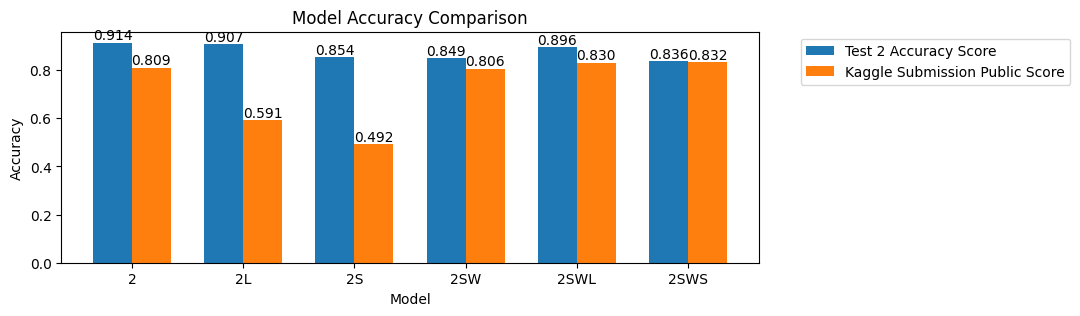

In [ ]:
bar_width = 0.35

# Calculate positions
index = np.arange(len(approach2acc['OurTest']))

plt.figure(figsize=(9, 3))

# Plot bars for 'OurTest'
bars1 = plt.bar(index, approach2acc['OurTest'], bar_width, label='Test 2 Accuracy Score')
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.3f}', ha='center', va='bottom')

# Plot bars for 'KaggleSub'
bars2 = plt.bar(index + bar_width, approach2acc['KaggleSub'], bar_width, label='Kaggle Submission Public Score')
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.3f}', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(index + bar_width / 2, legend2)

# Create a combined legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display plot
plt.show()